In [20]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [31]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

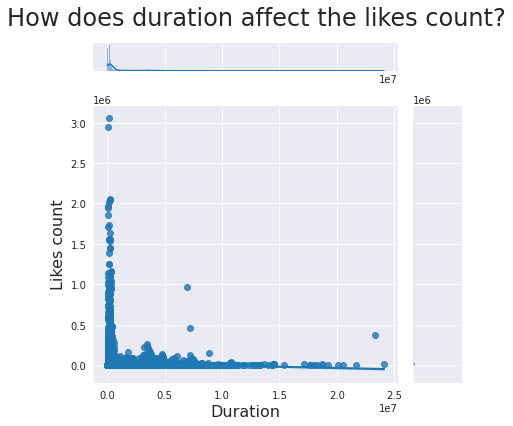

In [36]:
# Plot the jointplot
sns.set_style('darkgrid');
p = sns.jointplot(x='duration',y='likes_count',data=df,kind='reg')

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
  
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

In [43]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [38]:
df

,avatar_url,city,comments_count,country_code,created_at,description,first_name,followers,followers_count,followings,...,station_urn,track_count,uri,urn,user_albums,user_playlist_without_albums,user_top_tracks,user_tracks,username,verified
0,https://i1.sndcdn.com/avatars-000723723973-qtb...,NaN,0,FR,2016-10-12T22:04:43Z,NaN,NaN,235133933,3,"138934049,605567652,235133933,261197982,604286",...,soundcloud:system-playlists:artist-stations:26...,0,https://api.soundcloud.com/users/261128192,soundcloud:users:261128192,NaN,"314247842,593639301,321596631,266859227,296074...",NaN,NaN,adèle,False
1,https://i1.sndcdn.com/avatars-000507859965-mpc...,NaN,0,NaN,2017-10-16T15:41:53Z,NaN,NaN,NaN,0,"141687168,5603465,21113102,96841112,14830753,3...",...,soundcloud:system-playlists:artist-stations:33...,0,https://api.soundcloud.com/users/338315266,soundcloud:users:338315266,NaN,NaN,NaN,NaN,adele,False
2,https://i1.sndcdn.com/avatars-000270857665-bnc...,NaN,0,NaN,2016-05-18T09:17:14Z,NaN,NaN,NaN,3,267075468,...,soundcloud:system-playlists:artist-stations:22...,0,https://api.soundcloud.com/users/227758087,soundcloud:users:227758087,NaN,327168347,NaN,NaN,Adele,False
3,https://i1.sndcdn.com/avatars-000242997710-jw1...,NaN,0,NaN,2016-07-30T15:12:11Z,NaN,Adele,"459549,244431741",6,NaN,...,soundcloud:system-playlists:artist-stations:24...,0,https://api.soundcloud.com/users/244316169,soundcloud:users:244316169,NaN,NaN,NaN,NaN,Adele,False
4,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2021-09-12T23:53:30Z,NaN,Аделина,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1029605386,soundcloud:users:1029605386,NaN,NaN,NaN,NaN,Adele,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,https://i1.sndcdn.com/avatars-001049708419-ld1...,NaN,0,NaN,2021-08-11T10:02:50Z,NaN,Siddharth,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1017825766,soundcloud:users:1017825766,NaN,NaN,NaN,NaN,Imagine Dragon,False
3071,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2019-12-02T22:02:45Z,NaN,NaN,NaN,1,NaN,...,soundcloud:system-playlists:artist-stations:74...,0,https://api.soundcloud.com/users/743142379,soundcloud:users:743142379,NaN,NaN,NaN,NaN,imagine dragon,False
3072,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2013-06-05T20:02:23Z,NaN,NaN,54274065,1,NaN,...,soundcloud:system-playlists:artist-stations:47...,0,https://api.soundcloud.com/users/47083503,soundcloud:users:47083503,NaN,NaN,NaN,NaN,imaginedragon_mus,False
3073,https://i1.sndcdn.com/avatars-000126195889-fqk...,NaN,0,NaN,2015-01-19T22:14:43Z,NaN,NaN,"339069036,116946423",2,"1807424,1078690,1301673,1546189,1722899,114782...",...,soundcloud:system-playlists:artist-stations:13...,0,https://api.soundcloud.com/users/133948403,soundcloud:users:133948403,NaN,954351964,NaN,NaN,imagine12dragon,False


/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


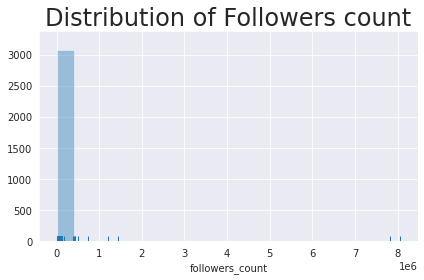

In [42]:
sns.set_style('darkgrid');
sns.distplot(df.followers_count, bins=20, kde=False, rug=True,label = 'Distribution of Followers count');

# Set title for plot
plt.title( "Distribution of Followers count" , size = 24 ) 
# Display figure
plt.tight_layout()

<AxesSubplot:xlabel='followers_count', ylabel='Density'>

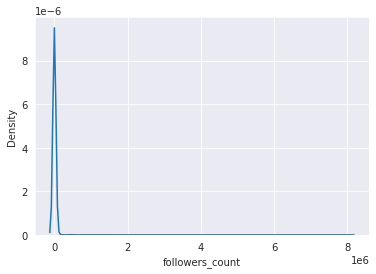

In [45]:
sns.set_style('darkgrid');
sns.kdeplot(data=df,x = 'followers_count')

<AxesSubplot:xlabel='track_count', ylabel='followers_count'>

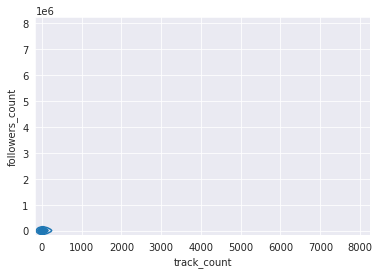

In [46]:
sns.kdeplot(data=df,x = 'track_count',y = 'followers_count')